In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Research paper\Data\dataset_final.csv")

In [3]:
train_val, test = train_test_split(data, test_size=0.15, random_state=42)
train, val = train_test_split(train_val, test_size=0.1765, random_state=42)

In [4]:
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)

In [41]:
# Load your data
data = pd.read_csv(r'C:\Users\Admin\Desktop\Research paper\Data\val.csv')  # Replace with your data path
patient_id = data['Patient ID']
X = data.drop(columns=['Patient ID'])
X_val = np.array(X)

In [42]:
def reshape_patient_data(X):
    # Assume X has shape (n_samples, 102)
    hip = X[:, :51]   # first 51 features
    knee = X[:, 51:]  # next 51 features
    # Stack hip and knee features along the last axis → shape: (n_samples, 51, 2)
    return np.stack((hip, knee), axis=-1)

In [43]:
K_val = reshape_patient_data(X_val)

In [44]:
K_val

array([[[32.54813067, 15.07984479],
        [31.73232356, 13.522474  ],
        [30.41198934, 12.77422762],
        ...,
        [30.40853173, 17.09035335],
        [29.84595269, 14.20095969],
        [29.21880086, 12.61992645]],

       [[39.10690117, 19.21490479],
        [38.84836477, 19.93583306],
        [38.3054433 , 21.53415295],
        ...,
        [37.71074672, 20.65586043],
        [37.59547572, 18.36011446],
        [37.40702057, 17.69695282]],

       [[42.22774506, 22.75442568],
        [41.44035878, 23.68586103],
        [40.3945875 , 25.53424656],
        ...,
        [42.79233207, 23.56301255],
        [42.22293117, 21.15710254],
        [41.59594599, 20.62459373]],

       ...,

       [[44.88043976, 31.47139549],
        [42.71307519, 30.43140068],
        [40.86098925, 30.73870446],
        ...,
        [48.05828538, 37.20674376],
        [45.92278637, 33.25038023],
        [43.93202591, 31.0074749 ]],

       [[18.19816971, 24.7763958 ],
        [17.73157064, 25.27

In [45]:
K_val.shape

(138, 51, 2)

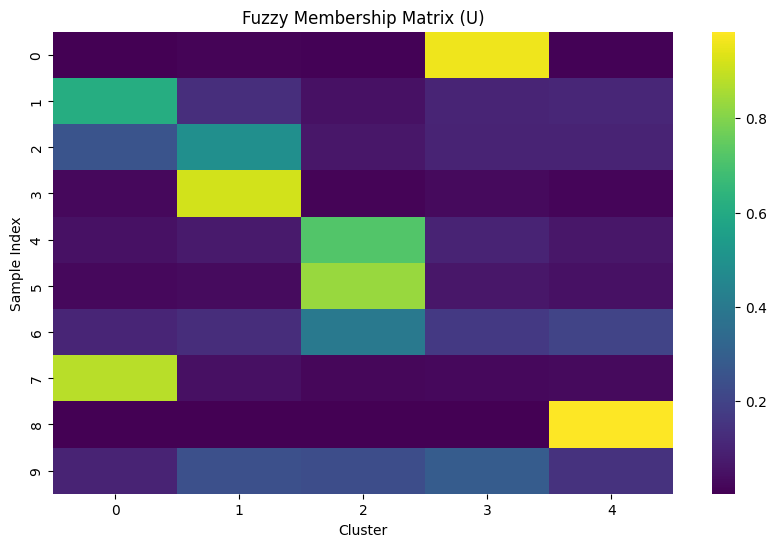

In [4]:
from fcmeans import FCM
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dummy latent representations (e.g., from your LSTM encoder)
latent = np.random.rand(10, 8)  # 100 samples, 8-dim latent space

# Fuzzy clustering
fcm = FCM(n_clusters=5)
fcm.fit(latent)

# Membership matrix
U = fcm.u  # shape: (100, 5)

# Plot heatmap of membership matrix
plt.figure(figsize=(10, 6))
sns.heatmap(U, cmap='viridis', annot=False, cbar=True)
plt.title("Fuzzy Membership Matrix (U)")
plt.xlabel("Cluster")
plt.ylabel("Sample Index")
plt.show()


In [3]:
from tensorflow.keras.utils import plot_model


In [4]:
import sys
import os
sys.path.append(r"C:\Users\Admin\Desktop\Research paper\Model")
sys.path.append(r"C:\Users\Admin\Desktop\Research paper\helper") 

from LSTM import LSTMAutoencoder
import pydot

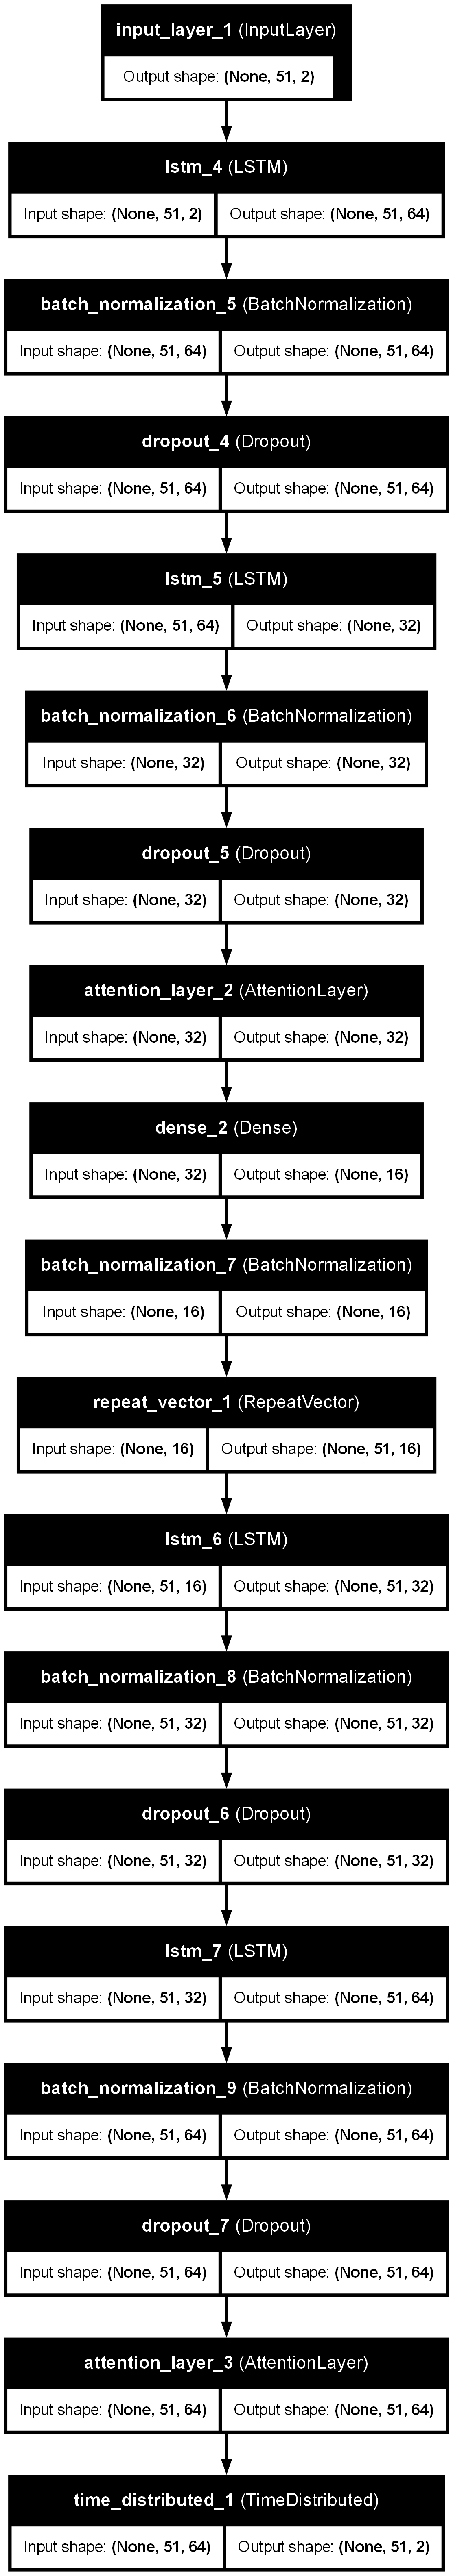

In [5]:
ae = LSTMAutoencoder(input_shape=(51, 2), use_attention=True)  # or False
plot_model(ae.model, to_file='autoencoder_model.png', show_shapes=True, show_layer_names=True)